In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ruta="https://raw.githubusercontent.com/marinlopabi/Temas-Selectos-PQ-AD-Python/refs/heads/main/Datos/contam2022.csv"

In [ ]:
contam = pd.read_csv(ruta, parse_dates = True, index_col=0) #leyendo datos de los contaminantes
contam.head()

,Centro Ozono,Centro diÛxido de azufre,Centro diÛxido de nitrÛgeno,Centro monÛxido de carbono,Centro PM10
Fecha,,,,,
2022-01-01,36.916667,6.333333,22.458333,10.208333,106.916667
2022-01-02,17.250000,7.750000,15.833333,9.500000,97.875000
2022-01-03,24.083333,7.833333,17.875000,5.041667,61.958333
2022-01-04,27.583333,27.416667,27.125000,8.250000,91.333333
2022-01-05,30.875000,12.833333,25.791667,9.791667,94.000000


In [ ]:
contam.info() #obtener información de los datos

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2022-01-01 to 2022-12-31
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Centro Ozono                 365 non-null    float64
 1   Centro diÛxido de azufre     365 non-null    float64
 2   Centro diÛxido de nitrÛgeno  365 non-null    float64
 3   Centro monÛxido de carbono   365 non-null    float64
 4   Centro PM10                  365 non-null    float64
dtypes: float64(5)
memory usage: 17.1 KB


El coeficiente de correlación de Pearson (r) mide la fuerza y dirección de la relación lineal entre dos variables cuantitativas. Su valor siempre se encuentra en el rango -1 a 1. Está sujeto a suposiciones, como que los datos deben ser normales y tener una relación lineal.

In [ ]:
#obtener el coeficiente de correlación de Pearson

#todos los datos para este coeficiente deben ser normales
contam.corr(method='pearson')

,Centro Ozono,Centro diÛxido de azufre,Centro diÛxido de nitrÛgeno,Centro monÛxido de carbono,Centro PM10
Centro Ozono,1.000000,0.101920,0.142250,-0.003331,0.481932
Centro diÛxido de azufre,0.101920,1.000000,0.310672,0.180158,0.456039
Centro diÛxido de nitrÛgeno,0.142250,0.310672,1.000000,0.844692,0.626440
Centro monÛxido de carbono,-0.003331,0.180158,0.844692,1.000000,0.559163
Centro PM10,0.481932,0.456039,0.626440,0.559163,1.000000


In [ ]:
contam.columns = ['ozono','dioxido_azufre',
                  'dioxido_nitrogeno','monoxido_carbono',
                  'PM10']
contam.head()

,ozono,dioxido_azufre,dioxido_nitrogeno,monoxido_carbono,PM10
Fecha,,,,,
2022-01-01,36.916667,6.333333,22.458333,10.208333,106.916667
2022-01-02,17.250000,7.750000,15.833333,9.500000,97.875000
2022-01-03,24.083333,7.833333,17.875000,5.041667,61.958333
2022-01-04,27.583333,27.416667,27.125000,8.250000,91.333333
2022-01-05,30.875000,12.833333,25.791667,9.791667,94.000000


Prueba de Normalidad de Shapiro–Wilk.
* La prueba de Shapiro–Wilk se utiliza para evaluar si un conjunto de datos proviene de una distribución normal.



    Hipótesis nula (H₀):
    La muestra proviene de una distribución normal.
    Se acepta H₀ si el valor p es mayor que 0.05.

    Hipótesis alternativa (H₁):
    La muestra no proviene de una distribución normal.
    Se rechaza H₀ (y se acepta H₁) si el valor p es menor que 0.05.




In [ ]:
#para prueba de hipótesis
#p < 0.05 se rechaza hipotesis nula
#hay q importar la paqueteria de scipy (contiene herramientas estadística para número grande de datos)

from scipy.stats import shapiro

for col in contam.columns:
    stat, p = shapiro(contam[col])
    print(f"{col}: Estadístico = {stat:.3f}, p-valor = {p:.8f}")

ozono: Estadístico = 0.946, p-valor = 0.00000000
dioxido_azufre: Estadístico = 0.791, p-valor = 0.00000000
dioxido_nitrogeno: Estadístico = 0.981, p-valor = 0.00010877
monoxido_carbono: Estadístico = 0.941, p-valor = 0.00000000
PM10: Estadístico = 0.980, p-valor = 0.00005488


En la prueba anterior se valida la prueba negativa, los p valores indican que los datos no son normales, por lo cual debemos aplicar otro método de correlación.

Correlación de Spearman

Es una prueba no parámetrica (no necesita supuestos). No trabaja con valores sino con rangos y se usa cuando los datos no cumplen la condición de normalidad. La relación no debe ser lineal pero sí monótona y los valores atípicos muy extremos si pueden llegar a afectar este método.

In [ ]:
corr_spearman=contam.corr(method="spearman") #para aplicar la prueba de spearman
print("Matriz de correlación de Spearmam:\n")
print(corr_spearman)

Matriz de correlación de Spearmam:

                      ozono  dioxido_azufre  dioxido_nitrogeno  \
ozono              1.000000        0.197253           0.181516   
dioxido_azufre     0.197253        1.000000           0.416420   
dioxido_nitrogeno  0.181516        0.416420           1.000000   
monoxido_carbono   0.051342        0.296297           0.847467   
PM10               0.481537        0.585443           0.643303   

                   monoxido_carbono      PM10  
ozono                      0.051342  0.481537  
dioxido_azufre             0.296297  0.585443  
dioxido_nitrogeno          0.847467  0.643303  
monoxido_carbono           1.000000  0.571305  
PM10                       0.571305  1.000000  


En estos casos correlacion no es lo mismo que causalidad, siguen la misma tendencia, pero no se sabe si por influencia de uno en otro. La causalidad implica que un cambio en una variable provoca un cambio en otra, existe una relación de causa y efecto.

In [ ]:
import seaborn as sns #gráfica más profesional de manera sencilla

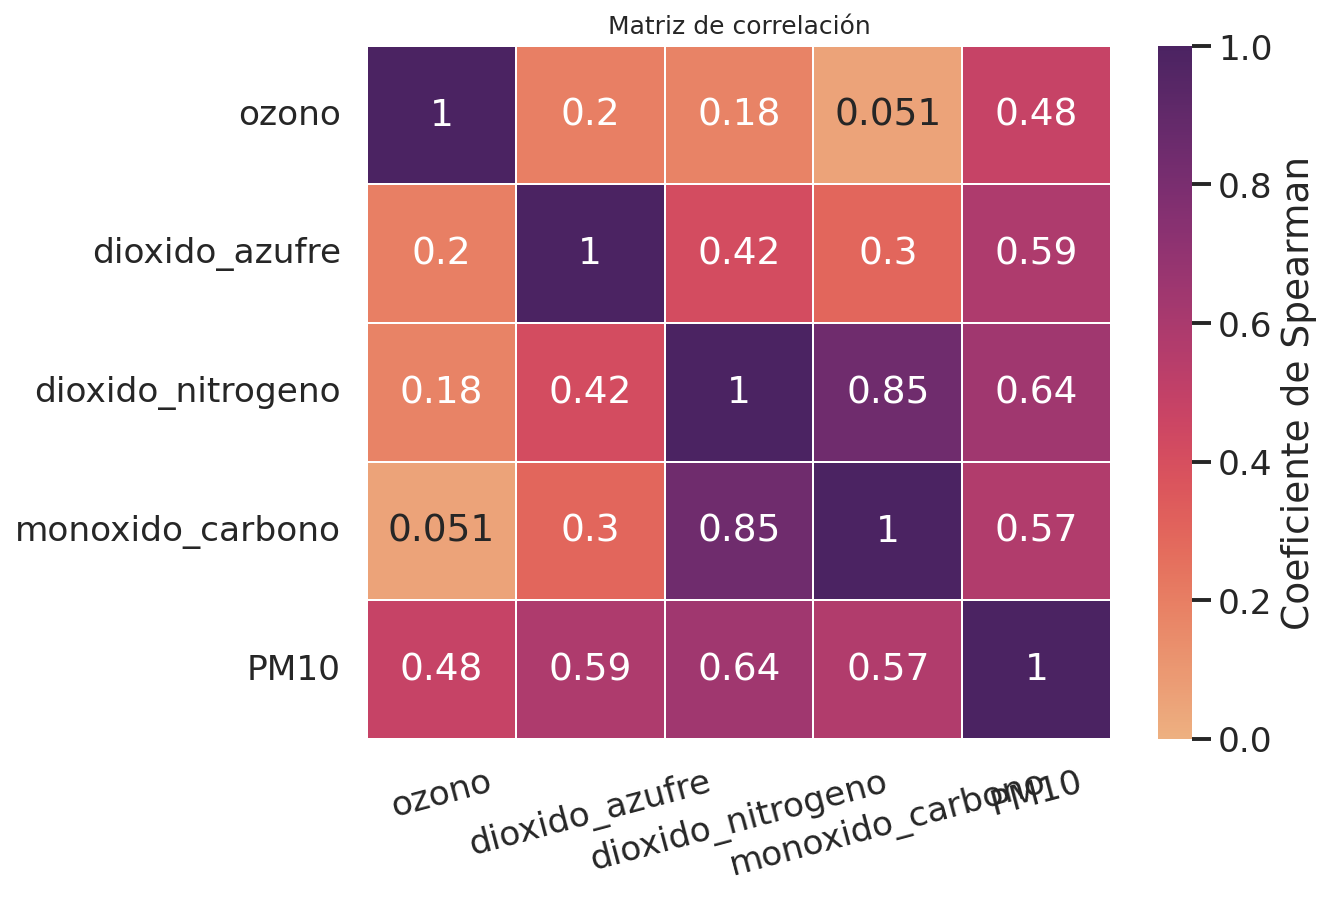

In [ ]:
#crear una figura de tamaño 8x6 pulgadas
plt.figure(figsize=(8,6), dpi=150)

#crear el mapa de calor de la matriz correlación de Spearman
sns.heatmap(
    corr_spearman,  #llamando a la matriz correlacion
    annot=True,  #muestra los valores numéricos de correlacion dentro de cada celda
    cmap="flare", #para la paleta de colores, en este caso tonos verdes y amarillos
    linewidths=0.2,  #grosor de las lineas que separan las celdas de cada mapa
    cbar_kws={"label":"Coeficiente de Spearman"}, #etiqueta de la barra de color
    vmin=0, vmax=1, center=0.5) #rango de colores

#para el título
plt.title("Matriz de correlación", fontsize=12)

#rotar las etiquetas del eje X para que se vea mejor
plt.xticks(rotation=15)
plt.show()

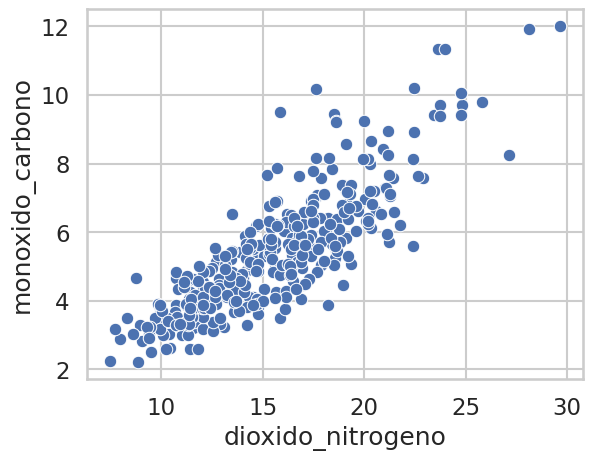

In [ ]:
#crear un diagrama de dispersion (para los que tenian más relación)
sns.scatterplot(
    data=contam, #llama la data que contiene los datos a graficar
    x="dioxido_nitrogeno",
    y="monoxido_carbono"
)
#agregar cuadrículas al gráfico
plt.grid(True)
plt.show()

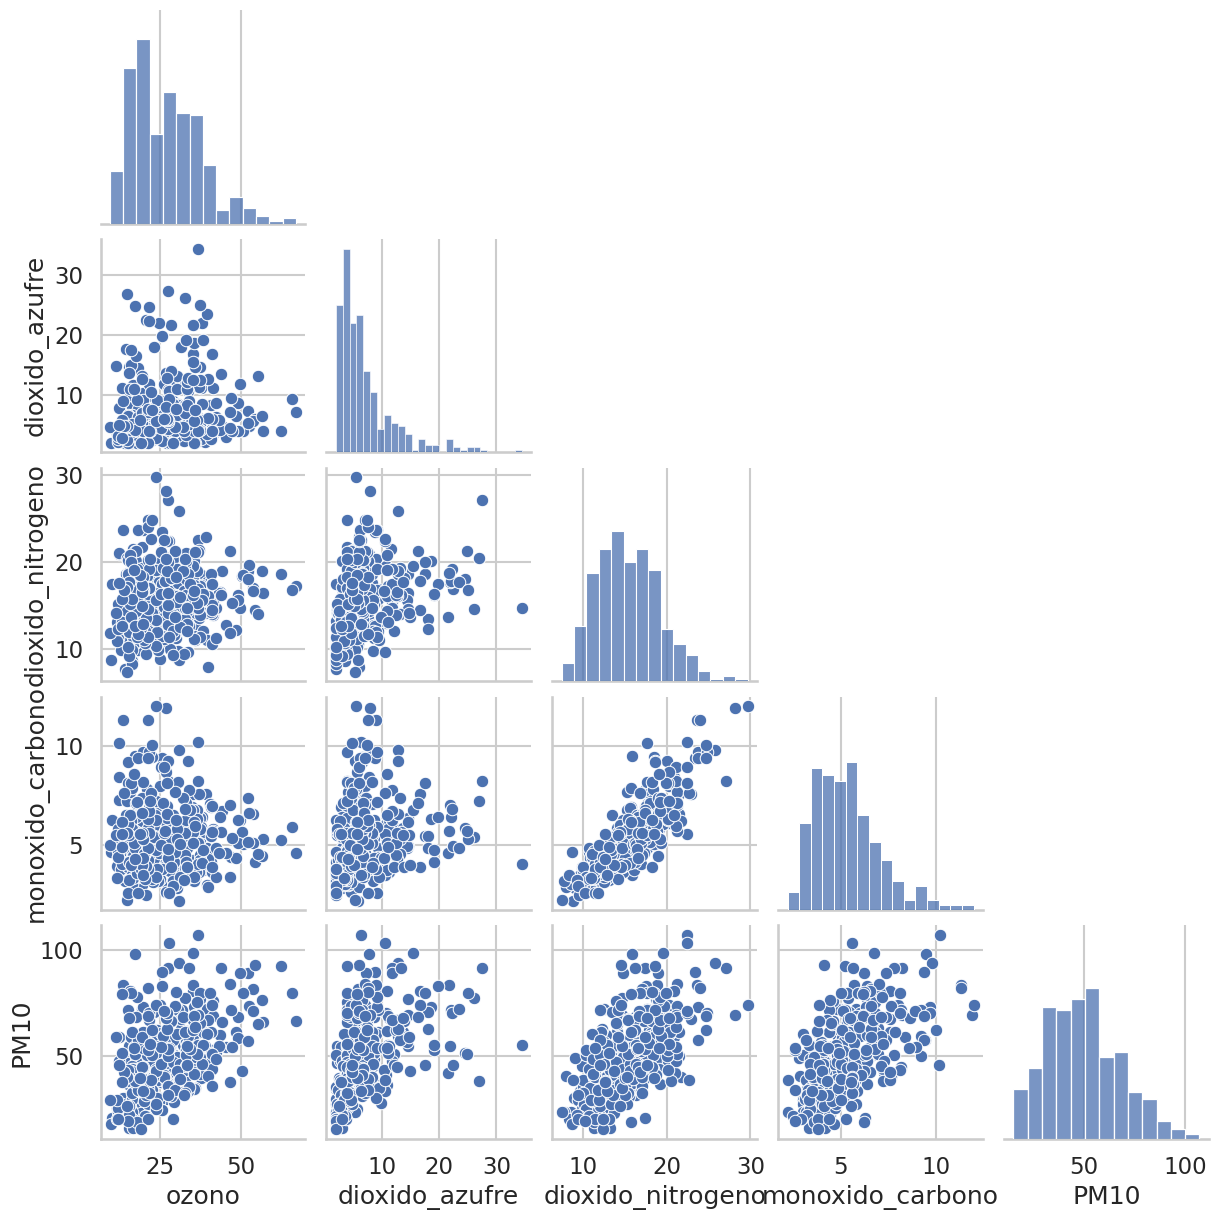

In [ ]:
sns.pairplot(contam,corner=True) #crea una matriz de diagramas de dispersión con todas las comparaciones posible de variables
plt.show()

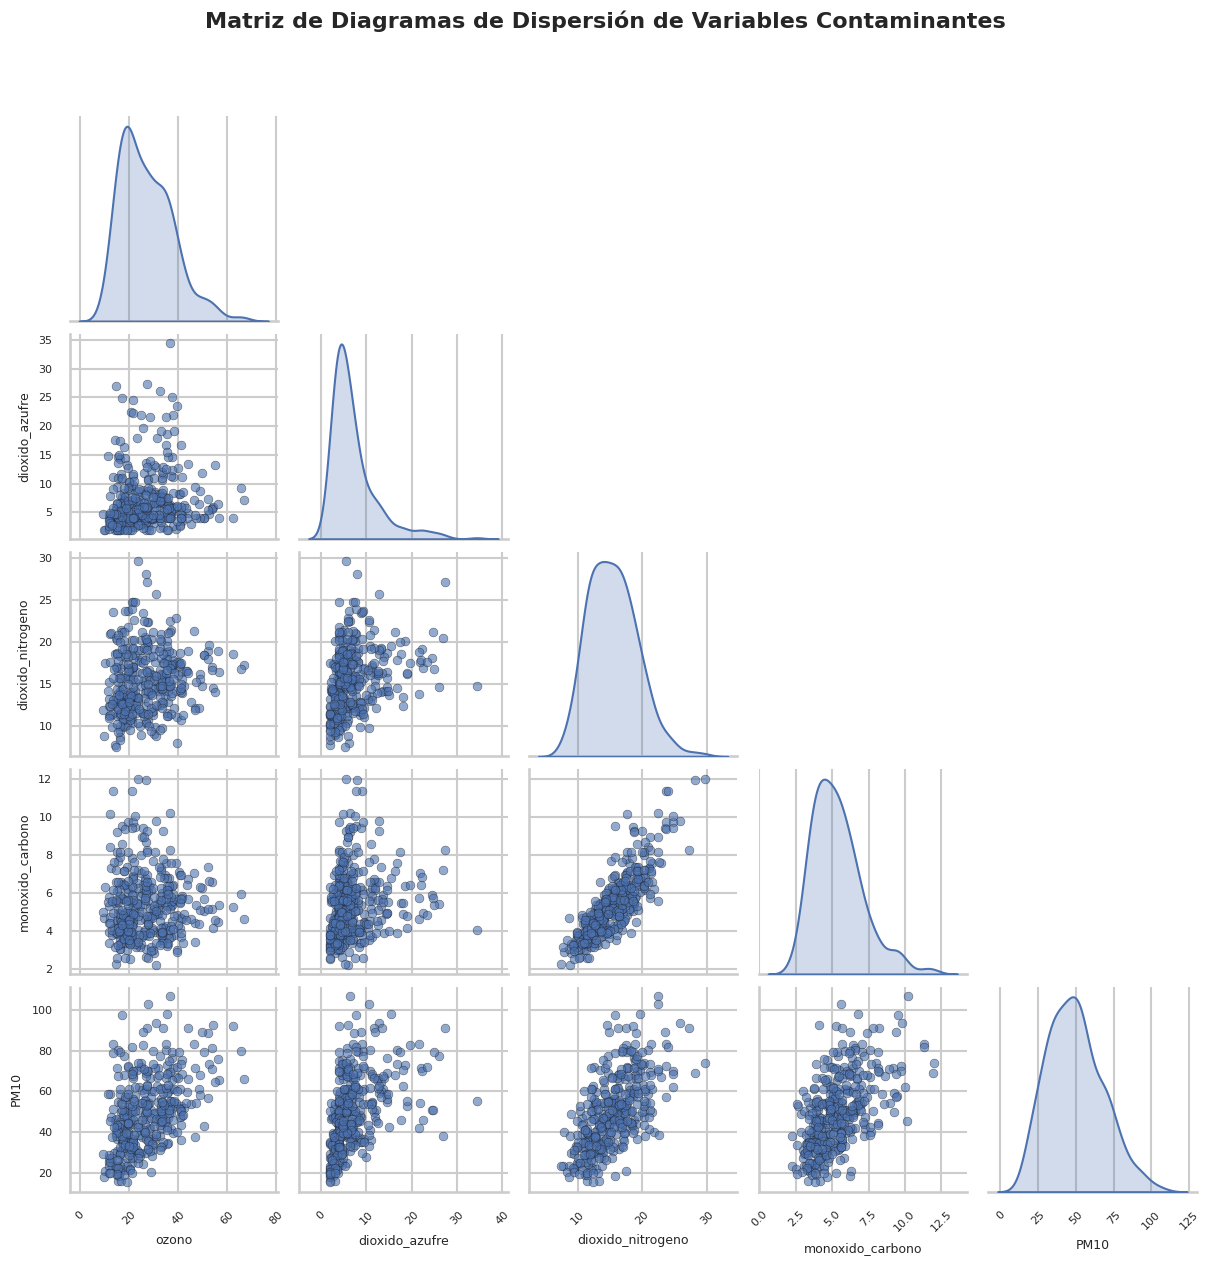

In [ ]:
#creando una gráfica mejorada con chat gpt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# ==============================
# CONFIGURACIÓN GENERAL
# ==============================
sns.set_theme(style="whitegrid", context="talk")

# Detectar si hay variables categóricas para usar como hue
categorical_cols = contam.select_dtypes(include=['object', 'category']).columns
hue_var = categorical_cols[0] if len(categorical_cols) > 0 else None

# ==============================
# CREAR PAIRPLOT
# ==============================
pair = sns.pairplot(
    contam,
    hue=hue_var,
    corner=True,
    diag_kind="kde",
    palette="viridis" if hue_var else None,
    plot_kws={
        "alpha": 0.6,
        "s": 40,
        "edgecolor": "k",
        "linewidth": 0.4
    }
)

# ==============================
# MEJORAS VISUALES
# ==============================

# Título general
pair.fig.suptitle(
    "Matriz de Diagramas de Dispersión de Variables Contaminantes",
    fontsize=16, fontweight="bold", y=1.02
)

# Ajustar fuentes de ejes
for ax in pair.axes.flatten():
    if ax is not None:
        ax.set_xlabel(ax.get_xlabel(), fontsize=9, labelpad=6)
        ax.set_ylabel(ax.get_ylabel(), fontsize=9, labelpad=6)
        # Rotar etiquetas del eje X para que no se monten
        ax.tick_params(axis='x', labelrotation=45, labelsize=8)
        ax.tick_params(axis='y', labelsize=8)

# Ajustar márgenes
pair.fig.tight_layout(pad=1.2, w_pad=0.5, h_pad=0.5)

# Personalizar la leyenda (si existe)
if hasattr(pair, "_legend") and pair._legend is not None:
    pair._legend.set_title(hue_var if hue_var else "Categoría")
    for text in pair._legend.texts:
        text.set_fontsize(10)
    pair._legend.get_title().set_fontsize(11)

# Mostrar gráfico
plt.show()


In [ ]:
import sys
!{sys.executable} -m pip install pingouin  #importa la librería pinguin que permite realizar operaciones estadísticas más complejas


In [ ]:
import pingouin as pg

In [ ]:
corr = pg.pairwise_corr(contam, method='spearman')
corr.round(3) #valor de redondeo de la correlación

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,ozono,dioxido_azufre,spearman,two-sided,365,0.197,"[0.1, 0.29]",0.000,0.968
1,ozono,dioxido_nitrogeno,spearman,two-sided,365,0.182,"[0.08, 0.28]",0.000,0.938
2,ozono,monoxido_carbono,spearman,two-sided,365,0.051,"[-0.05, 0.15]",0.328,0.165
3,ozono,PM10,spearman,two-sided,365,0.482,"[0.4, 0.56]",0.000,1.000
4,dioxido_azufre,dioxido_nitrogeno,spearman,two-sided,365,0.416,"[0.33, 0.5]",0.000,1.000
5,dioxido_azufre,monoxido_carbono,spearman,two-sided,365,0.296,"[0.2, 0.39]",0.000,1.000
6,dioxido_azufre,PM10,spearman,two-sided,365,0.585,"[0.51, 0.65]",0.000,1.000
7,dioxido_nitrogeno,monoxido_carbono,spearman,two-sided,365,0.847,"[0.82, 0.87]",0.000,1.000
8,dioxido_nitrogeno,PM10,spearman,two-sided,365,0.643,"[0.58, 0.7]",0.000,1.000
9,monoxido_carbono,PM10,spearman,two-sided,365,0.571,"[0.5, 0.64]",0.000,1.000


In [ ]:
corr.sort_values(by=['r'], ascending=False)[['X','Y','r']].round(3) #para ubicarlo de forma descendente con tres cifras significativas

,X,Y,r
7,dioxido_nitrogeno,monoxido_carbono,0.847
8,dioxido_nitrogeno,PM10,0.643
6,dioxido_azufre,PM10,0.585
9,monoxido_carbono,PM10,0.571
3,ozono,PM10,0.482
4,dioxido_azufre,dioxido_nitrogeno,0.416
5,dioxido_azufre,monoxido_carbono,0.296
0,ozono,dioxido_azufre,0.197
1,ozono,dioxido_nitrogeno,0.182
2,ozono,monoxido_carbono,0.051


Para ver si los contaminantes tienen alguna relación con los factores meteorológicos

In [ ]:
ruta='https://raw.githubusercontent.com/marinlopabi/Temas-Selectos-PQ-AD-Python/refs/heads/main/Datos/redmet_2022.csv' #Ca
met = pd.read_csv(ruta, parse_dates = True, index_col=0)
met.head()

,RH,TMP,WDR,WSP
fecha,,,,
2022-01-01,44.808362,15.316545,174.009766,1.458594
2022-01-02,47.470383,14.371273,190.490494,2.208935
2022-01-03,61.131769,13.247547,171.861660,1.663043
2022-01-04,49.406427,14.986535,159.283096,1.285743
2022-01-05,42.854281,15.608000,156.118095,1.459048


In [ ]:
datos = pd.concat([contam,met],axis=1) #contact se utiliza para contatenar o unir dos datas (se unen los datos de contaminantes con datos meteorológicos)
datos.head()

,ozono,dioxido_azufre,dioxido_nitrogeno,monoxido_carbono,PM10,RH,TMP,WDR,WSP
2022-01-01,36.916667,6.333333,22.458333,10.208333,106.916667,44.808362,15.316545,174.009766,1.458594
2022-01-02,17.250000,7.750000,15.833333,9.500000,97.875000,47.470383,14.371273,190.490494,2.208935
2022-01-03,24.083333,7.833333,17.875000,5.041667,61.958333,61.131769,13.247547,171.861660,1.663043
2022-01-04,27.583333,27.416667,27.125000,8.250000,91.333333,49.406427,14.986535,159.283096,1.285743
2022-01-05,30.875000,12.833333,25.791667,9.791667,94.000000,42.854281,15.608000,156.118095,1.459048


In [ ]:
corr_mat = datos.corr(method='spearman') #aplicando la correlación de spearman

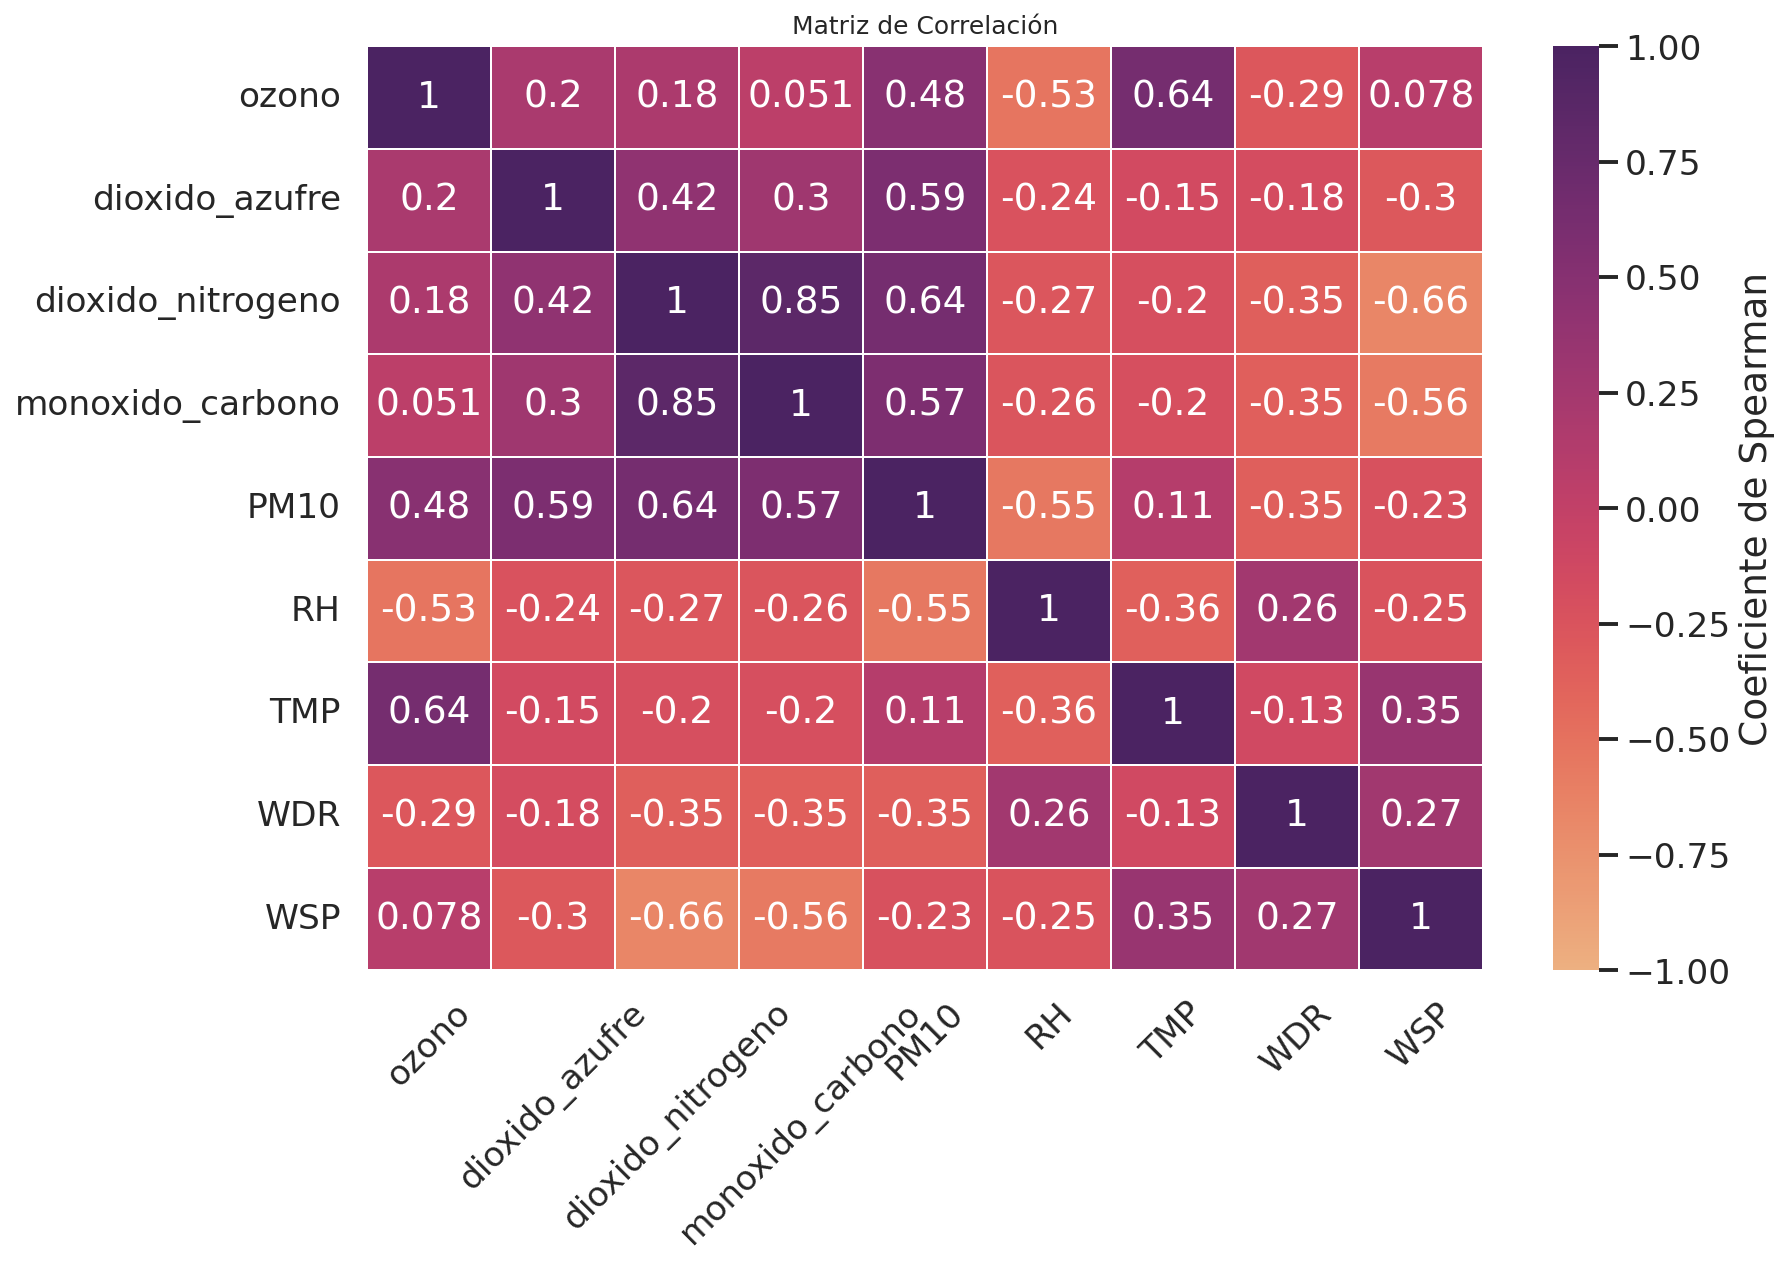

In [ ]:
plt.figure(figsize=(12, 8),dpi=150)
sns.heatmap(corr_mat, annot=True,
            cmap='flare',
            linewidths=0.2,
            cbar_kws={'label': 'Coeficiente de Spearman'},
           vmin = -1, vmax = 1, center = 0)
plt.title('Matriz de Correlación', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
corr = pg.pairwise_corr(datos, method='spearman')
corr.sort_values(by=['r'], ascending=False)[['X','Y','r']].round(3)

,X,Y,r
15,dioxido_nitrogeno,monoxido_carbono,0.847
16,dioxido_nitrogeno,PM10,0.643
5,ozono,TMP,0.635
10,dioxido_azufre,PM10,0.585
21,monoxido_carbono,PM10,0.571
3,ozono,PM10,0.482
8,dioxido_azufre,dioxido_nitrogeno,0.416
34,TMP,WSP,0.346
9,dioxido_azufre,monoxido_carbono,0.296
35,WDR,WSP,0.268


In [ ]:
from scipy.stats import spearmanr, pearsonr #para ver los coeficientes de cada método

# Datos de ejemplo (no lineales, pero monótonos)
x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [2, 4, 6, 8, 10, 12, 14, 16, 30]  # crece en general, pero con un valor extremo al final

# Crear un DataFrame
df = pd.DataFrame({'X': x, 'Y': y})

# Calcular las correlaciones
r_pearson, p_pearson = pearsonr(df['X'], df['Y'])
r_spearman, p_spearman = spearmanr(df['X'], df['Y'])

print(f"Coeficiente de Pearson:  r = {r_pearson:.3f}, p = {p_pearson:.4f}")
print(f"Coeficiente de Spearman:  ρ = {r_spearman:.3f}, p = {p_spearman:.4f}")

Coeficiente de Pearson:  r = 0.917, p = 0.0005
Coeficiente de Spearman:  ρ = 1.000, p = 0.0000


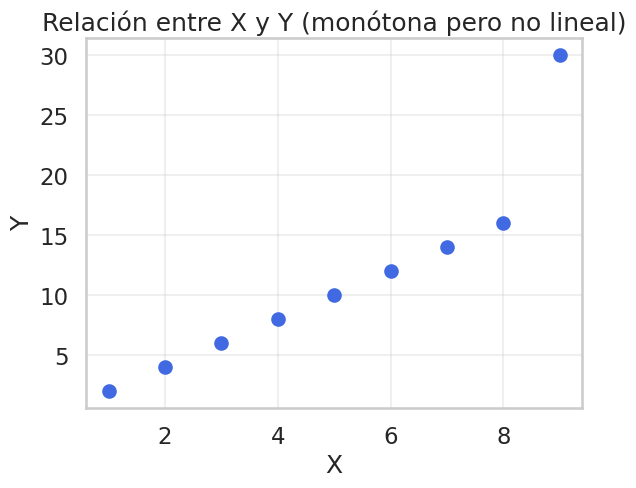

In [ ]:
plt.scatter(df['X'], df['Y'], color='royalblue') #para graficar la relación entre las variables
plt.title('Relación entre X y Y (monótona pero no lineal)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(alpha=0.3)
plt.show()

In [ ]:
ruta="https://raw.githubusercontent.com/marinlopabi/Temas-Selectos-PQ-AD-Python/refs/heads/main/Datos/rama_2015.csv"

In [ ]:
df_15 = pd.read_csv(ruta, parse_dates = True, index_col=0)
df_15.head()

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
fecha,,,,,,,,
2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052
2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061
2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789


El Test de Mann-Kendall nos ayuda a detectar tendencias en series temporales.